# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('shopping_trends.csv')
data

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


# EDA

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data['Subscription Status']=le.fit_transform(data['Subscription Status'])
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3.1,1,14,3
1,2,19,1,64,3.1,1,2,3
2,3,50,1,73,3.1,1,23,6
3,4,21,1,90,3.5,1,49,6
4,5,45,1,49,2.7,1,31,0


In [4]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64

# Assign X & Y

In [5]:
x=data.iloc[:,:-1]
x.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases
0,1,55,1,53,3.1,1,14
1,2,19,1,64,3.1,1,2
2,3,50,1,73,3.1,1,23
3,4,21,1,90,3.5,1,49
4,5,45,1,49,2.7,1,31


In [6]:
y=data.iloc[:,-1:]
y.head()

,Frequency of Purchases
0,3
1,3
2,6
3,6
4,0


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Subscription Status'}>],
       [<Axes: title={'center': 'Previous Purchases'}>,
        <Axes: title={'center': 'Frequency of Purchases'}>, <Axes: >]],
      dtype=object)

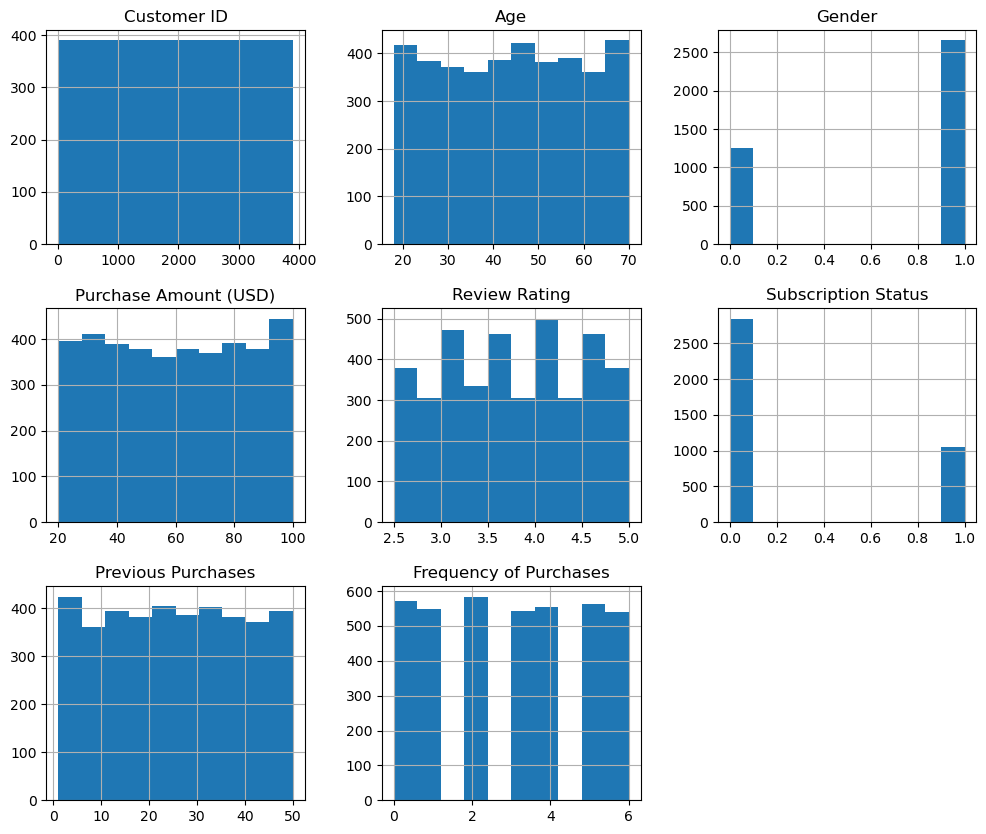

In [7]:
data.hist(figsize=(12,10))

# Split the data

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (2925, 7)

Training data-y- Shape:	 (2925, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (975, 7)

Testing data(y-Outcome) Shape:	 (975, 1)


# Build the model

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [4 1 2 3 3 0 1 5 6 1 1 2 2 6 5 1 2 6 1 6 6 1 3 2 3 5 6 1 3 6 2 2 6 3 0 6 2
 2 3 6 3 3 5 4 2 6 3 1 0 6 4 5 5 2 5 1 4 2 5 4 4 0 6 6 4 6 6 3 2 6 0 4 5 4
 0 2 3 4 5 3 5 6 0 4 1 0 4 5 6 4 2 0 1 2 5 4 3 0 6 1 4 5 0 0 6 4 3 3 3 1 0
 4 0 1 1 5 1 3 2 1 6 5 6 3 1 4 0 0 3 3 3 3 6 3 0 1 0 4 0 5 6 0 2 0 5 1 1 4
 3 5 1 5 3 4 6 1 4 2 0 1 0 6 6 3 5 2 2 3 6 1 3 3 5 0 2 6 6 6 4 0 3 3 1 4 0
 0 4 0 1 3

# Performance Measures

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('*'*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('*'*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('*'*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.15076923076923077
****************************************************************************************************
Confusion Matric:
 [[24 18 30 25 17 16 19]
 [21 21 20 14 11 17 13]
 [19 29 14 20 15 23 18]
 [21 13 18 17 22 22 17]
 [13 27 17 22 34 20 20]
 [21 24 16 31 16 21 26]
 [17 19 17 35 15 14 16]]
****************************************************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.18      0.16      0.17       149
           1       0.14      0.18      0.16       117
           2       0.11      0.10      0.10       138
           3       0.10      0.13      0.12       130
           4       0.26      0.22      0.

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))
print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 7.509743589743589

RMSE: 	 2.7403911380939014

Variance Score:	 -0.8674676322544175

R-Square: 	 -0.8701931716906466


[Text(0.3849173022884633, 0.98, 'x[6] <= 21.5\nentropy = 2.806\nsamples = 2925\nvalue = [423, 430, 446, 412, 400, 408, 406]'),
 Text(0.07025128304795301, 0.94, 'x[0] <= 182.5\nentropy = 2.796\nsamples = 1244\nvalue = [190, 194, 216, 158, 170, 142, 174]'),
 Text(0.008418941097805605, 0.9, 'x[3] <= 84.0\nentropy = 2.625\nsamples = 51\nvalue = [7, 1, 10, 11, 5, 7, 10]'),
 Text(0.004194273904321926, 0.86, 'x[1] <= 34.5\nentropy = 2.463\nsamples = 39\nvalue = [3, 0, 6, 11, 5, 5, 9]'),
 Text(0.0019451705063521973, 0.82, 'x[3] <= 31.0\nentropy = 1.936\nsamples = 16\nvalue = [3, 0, 4, 6, 0, 0, 3]'),
 Text(0.0009725852531760987, 0.78, 'x[3] <= 24.0\nentropy = 0.722\nsamples = 5\nvalue = [0, 0, 4, 0, 0, 0, 1]'),
 Text(0.00048629262658804933, 0.74, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0014588778797641482, 0.74, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0, 0]'),
 Text(0.0029177557595282963, 0.78, 'x[0] <= 170.5\nentropy = 1.435\nsamples = 11\nvalue = [3,

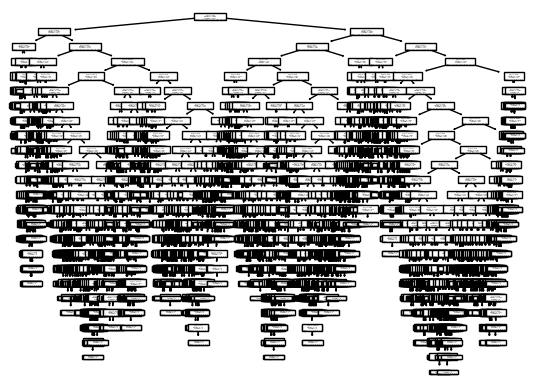

In [12]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [13]:
dt_clf.feature_names_in_

array(['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)',
       'Review Rating', 'Subscription Status', 'Previous Purchases'],
      dtype=object)

# Pruning

In [14]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.01)
pruned_tree.fit(xtrain, ytrain)
y_pruned = pruned_tree.predict(xtest)
prunedacc = accuracy_score(ytest, y_pruned)
print("Accuracy after pruning:", prunedacc)

Accuracy after pruning: 0.14153846153846153
